In [34]:
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('All_International_Cricket_Innings2[1].csv',parse_dates=['Start Date'])


1> firstly we view the dataset 

In [35]:
df.head()
df.tail()
# we observe that unnamed:0 and unnamed:8 has not any useful info.
#so we can drop these 2 columns

,Unnamed: 0,Player,Runs,Mins,BF,4s,6s,SR,Inns,Unnamed: 8,Opposition,Ground,Start Date
192342,186,SMH Kirmani (INDIA),11,50,36,1,0,30.55,4,NaN,Test v New Zealand,Wellington,1981-02-21
192343,187,N Kapil Dev (INDIA),9,36,26,1,0,34.61,4,NaN,Test v New Zealand,Wellington,1981-02-21
192344,188,RMH Binny (INDIA),26*,111,86,2,0,30.23,4,NaN,Test v New Zealand,Wellington,1981-02-21
192345,189,RJ Shastri (INDIA),19,70,54,3,0,35.18,4,NaN,Test v New Zealand,Wellington,1981-02-21
192346,190,B Yograj Singh (INDIA),6,37,28,1,0,21.42,4,NaN,Test v New Zealand,Wellington,1981-02-21


2> drop 2 columns

In [36]:
df.drop(['Unnamed: 0','Unnamed: 8'],axis=1,inplace=True)

In [37]:
df.columns
#so as we can see that columns mentioned above is dropped

Index(['Player', 'Runs', 'Mins', 'BF', '4s', '6s', 'SR', 'Inns', 'Opposition',
       'Ground', 'Start Date'],
      dtype='object')

3> to remove \ * sign from Run column

In [38]:
df['Runs']=df.Runs.str.replace('\*','')

C:\Users\DELL\AppData\Local\Temp\ipykernel_3112\3231119526.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Runs']=df.Runs.str.replace('\*','')


4> to remove all unwanted special char. & whitespace from columns

In [39]:
cols=[ 'Runs', 'Mins', 'BF', '4s', '6s', 'SR', 'Inns']
df[cols]=df[cols].apply(lambda x: x.str.replace(r'[^0-9]+',''))
df[cols]=df[cols].apply(lambda x: x.str.strip())
#strip method use to remove white space

C:\Users\DELL\AppData\Local\Temp\ipykernel_3112\1458721191.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df[cols]=df[cols].apply(lambda x: x.str.replace(r'[^0-9]+',''))


In [40]:
#some player didnt score so we will drop data
for i in cols:
    df = df[df[i] != '']
    df = df.astype({i :'float64'})

In [41]:
df.dtypes

Player                object
Runs                 float64
Mins                 float64
BF                   float64
4s                   float64
6s                   float64
SR                   float64
Inns                 float64
Opposition            object
Ground                object
Start Date    datetime64[ns]
dtype: object

In [42]:
df.Player

0                TWM Latham (NZ)
1                  WA Young (NZ)
2             KS Williamson (NZ)
3                 DP Conway (NZ)
4               HM Nicholls (NZ)
                   ...          
192342       SMH Kirmani (INDIA)
192343       N Kapil Dev (INDIA)
192344         RMH Binny (INDIA)
192345        RJ Shastri (INDIA)
192346    B Yograj Singh (INDIA)
Name: Player, Length: 125309, dtype: object

5> to separate nation name from player name

In [43]:
df_new=df.Player.str.split('(',expand=True)
df_new.head(3)

,0,1,2
0,TWM Latham,NZ),None
1,WA Young,NZ),None
2,KS Williamson,NZ),None


In [44]:
df_new[1]=df_new[1].str.replace(')','')
df_new.head(3)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3112\4052455863.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_new[1]=df_new[1].str.replace(')','')


,0,1,2
0,TWM Latham,NZ,None
1,WA Young,NZ,None
2,KS Williamson,NZ,None


In [45]:
df['Name']=df_new[0].str.strip()
df['Nation']=df_new[1].str.strip()
df.drop(['Player'],axis=1,inplace=True)

In [46]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Inns,Opposition,Ground,Start Date,Name,Nation
0,0.0,5.0,6.0,0.0,0.0,0.0,1.0,Test v England,Leeds,2022-06-23,TWM Latham,NZ
1,20.0,57.0,42.0,2.0,0.0,4761.0,1.0,Test v England,Leeds,2022-06-23,WA Young,NZ
2,31.0,97.0,64.0,5.0,0.0,4843.0,1.0,Test v England,Leeds,2022-06-23,KS Williamson,NZ
3,26.0,100.0,62.0,5.0,0.0,4193.0,1.0,Test v England,Leeds,2022-06-23,DP Conway,NZ
4,19.0,137.0,99.0,1.0,0.0,1919.0,1.0,Test v England,Leeds,2022-06-23,HM Nicholls,NZ


6> info. of highest Runs scorer

In [47]:
df[df.Runs==df.Runs.max()]

,Runs,Mins,BF,4s,6s,SR,Inns,Opposition,Ground,Start Date,Name,Nation
116856,400.0,778.0,582.0,43.0,4.0,6872.0,1.0,Test v England,St John's,2004-04-10,BC Lara,WI


In [61]:
#as we can see that brian lara stayed for 778 min. in pitch to score max. runs
#so is any other player stayed more than lara 
df[df.Mins > 778.0].Name

52327           AN Cook
71128           HM Amla
138348        G Kirsten
149392    ST Jayasuriya
Name: Name, dtype: object

7> most common score in dataset

In [62]:
df.Runs.value_counts()

0.0      13313
1.0       7166
2.0       5361
4.0       4871
5.0       4178
         ...  
262.0        1
269.0        1
251.0        1
317.0        1
280.0        1
Name: Runs, Length: 293, dtype: int64

<AxesSubplot:>

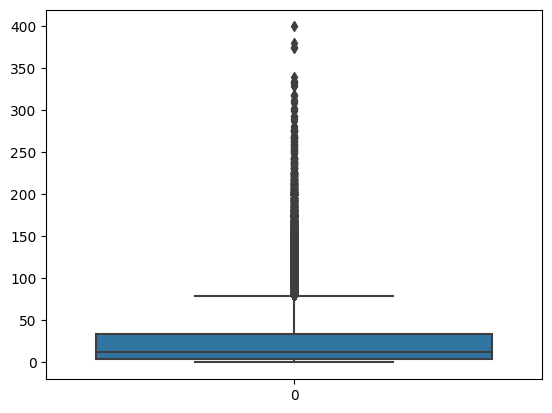

In [63]:
sns.boxplot(df.Runs)

8> players who scored 99

In [76]:
run_99=df[df.Runs==99.0]
print('no. of player score 99 : ',len(run_99))

no. of player score 99 :  99


In [77]:
#most 99 runs nation wise
run_99['Nation'].value_counts()

AUS      19
INDIA    14
ENG      13
NZ       11
PAK      11
SA        9
SL        8
WI        5
ZIM       5
IRE       2
UAE       1
SCOT      1
Name: Nation, dtype: int64

In [78]:
#player Name who scored most 99 
run_99.Name.value_counts()

SR Tendulkar      3
Misbah-ul-Haq     3
ML Hayden         2
AB de Villiers    2
ADR Campbell      2
                 ..
KP Pietersen      1
MJ Clarke         1
JP Duminy         1
MN Waller         1
Javed Miandad     1
Name: Name, Length: 81, dtype: int64

9> player with most duck in dataset

In [97]:
duck=df[df.Runs==0.0]
print('no. of player with duck score : ',duck.shape[0])

no. of player with duck score :  13313


In [86]:
duck.Name.value_counts()

JM Anderson        80
M Muralidaran      67
GD McGrath         66
CA Walsh           66
CS Martin          59
                   ..
DL Maddy            1
Zeeshan Maqsood     1
PS Masvaure         1
PM Nevill           1
Yashpal Sharma      1
Name: Name, Length: 2076, dtype: int64

In [101]:
df.Nation.value_counts()

#from given analysis we can say that Anderson score duck 80times
#and Australia has most duck scorer in their team 

AUS      15341
ENG      15183
INDIA    12817
NZ       12787
PAK      12318
WI       12096
SL       11605
SA       10387
ZIM       7290
BAN       6389
IRE       1581
AFG       1247
KENYA     1224
NED       1001
SCOT       936
CAN        620
UAE        394
BMUDA      259
HKG        196
NAM        165
PNG         99
TAN         83
NEPAL       82
OMA         77
UGA         69
Afr         64
ICC         64
Asia        62
LES         60
NGA         56
RWN         52
            52
SEY         49
Bhm         44
CAM         43
Ghana       39
MOZ         39
MWI         37
SLE         34
USA         31
MAL         30
Caym        30
3           27
BOT         26
SGP         23
TKY         22
KUW         19
DEN         19
Fin         19
Aut         18
ROM         17
GUE         17
LUX         16
CZK-R       15
QAT         15
JER         12
1            9
2            3
Name: Nation, dtype: int64

10> sort the nation as per their run

In [119]:
df.groupby('Nation')['Runs'].sum().sort_values(ascending=True).head()


Nation
1       31.0
2       34.0
TKY     66.0
Fin    185.0
GUE    209.0
Name: Runs, dtype: float64

In [120]:
#as we can see that some Nation name with 1,2,3 and whitespace

df['Nation'] = df['Nation'].replace({'1':'PAK', '2': 'DEN', '3': 'PAK','': 'rest'})

In [121]:
df.groupby('Nation')['Runs'].sum().sort_values(ascending=False).head()

Nation
AUS      424751.0
ENG      381943.0
INDIA    352881.0
PAK      307927.0
NZ       302106.0
Name: Runs, dtype: float64

11> player with most sixes 

In [125]:
df.groupby('Name').sum()['6s'].sort_values(ascending=False).head()

Name
CH Gayle         486.0
Shahid Afridi    417.0
BB McCullum      381.0
MJ Guptill       354.0
RG Sharma        353.0
Name: 6s, dtype: float64

12> player who score highest total run 

In [126]:
df.groupby('Name').sum().Runs.sort_values(ascending=False).head()

Name
SR Tendulkar        32653.0
KC Sangakkara       27415.0
RT Ponting          27022.0
JH Kallis           24669.0
DPMD Jayawardene    24564.0
Name: Runs, dtype: float64